In [1]:
# Import the dependancies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import the requests library
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-90.000, high=90.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

595

In [7]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
   
# Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | east london
Processing Record 2 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 3 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 4 of Set 1 | saint-augustin
Processing Record 5 of Set 1 | yangambi
Processing Record 6 of Set 1 | kudahuvadhoo
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | salalah
Processing Record 9 of Set 1 | bambous virieux
Processing Record 10 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 11 of Set 1 | san cristobal
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | chuy
Processing Record 14 of Set 1 | abu dhabi
Processing Record 15 of Set 1 | gamba
Processing Record 16 of Set 1 | cape town
Processing Record 17 of Set 1 | namanyere
Processing Record 18 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 19 of Set 1 | borgo san lorenzo
Processing Record

Processing Record 32 of Set 4 | tucuman
Processing Record 33 of Set 4 | itarema
Processing Record 34 of Set 4 | izhevskoye
Processing Record 35 of Set 4 | sumbe
Processing Record 36 of Set 4 | birao
Processing Record 37 of Set 4 | grindavik
Processing Record 38 of Set 4 | carballo
Processing Record 39 of Set 4 | leshukonskoye
Processing Record 40 of Set 4 | kathu
Processing Record 41 of Set 4 | urdzhar
City not found. Skipping...
Processing Record 42 of Set 4 | chatrapur
Processing Record 43 of Set 4 | torbay
Processing Record 44 of Set 4 | luderitz
Processing Record 45 of Set 4 | narsaq
Processing Record 46 of Set 4 | ritchie
Processing Record 47 of Set 4 | ijui
Processing Record 48 of Set 4 | aksu
Processing Record 49 of Set 4 | urumqi
Processing Record 50 of Set 4 | morros
Processing Record 1 of Set 5 | ajdabiya
Processing Record 2 of Set 5 | salym
Processing Record 3 of Set 5 | capreol
Processing Record 4 of Set 5 | salinas
Processing Record 5 of Set 5 | bousse
Processing Record 6 

Processing Record 26 of Set 8 | belmonte
Processing Record 27 of Set 8 | gazanjyk
Processing Record 28 of Set 8 | khuzdar
Processing Record 29 of Set 8 | conceicao da barra
Processing Record 30 of Set 8 | lalibela
Processing Record 31 of Set 8 | elat
Processing Record 32 of Set 8 | atar
Processing Record 33 of Set 8 | isfana
Processing Record 34 of Set 8 | havoysund
Processing Record 35 of Set 8 | les escoumins
Processing Record 36 of Set 8 | inta
Processing Record 37 of Set 8 | olinda
Processing Record 38 of Set 8 | khartoum
Processing Record 39 of Set 8 | codrington
Processing Record 40 of Set 8 | murud
Processing Record 41 of Set 8 | tapaua
City not found. Skipping...
Processing Record 42 of Set 8 | inhambane
Processing Record 43 of Set 8 | staunton
Processing Record 44 of Set 8 | verkhnyaya toyma
Processing Record 45 of Set 8 | moose factory
Processing Record 46 of Set 8 | ouesso
Processing Record 47 of Set 8 | necochea
Processing Record 48 of Set 8 | strelca
City not found. Skippi

Processing Record 15 of Set 12 | maghama
City not found. Skipping...
Processing Record 16 of Set 12 | gisors
Processing Record 17 of Set 12 | santana do livramento
Processing Record 18 of Set 12 | sevierville
Processing Record 19 of Set 12 | barsbuttel
City not found. Skipping...
Processing Record 20 of Set 12 | sao jose da coroa grande
Processing Record 21 of Set 12 | lannion
Processing Record 22 of Set 12 | mananara
Processing Record 23 of Set 12 | ayagoz
Processing Record 24 of Set 12 | oksfjord
Processing Record 25 of Set 12 | brockville
Processing Record 26 of Set 12 | maragogi
Processing Record 27 of Set 12 | thinadhoo
Processing Record 28 of Set 12 | novyy urengoy
Processing Record 29 of Set 12 | catole do rocha
Processing Record 30 of Set 12 | mormugao
Processing Record 31 of Set 12 | sehithwa
Processing Record 32 of Set 12 | tefe
Processing Record 33 of Set 12 | nanyuki
Processing Record 34 of Set 12 | roald
Processing Record 35 of Set 12 | kaka
Processing Record 36 of Set 12 

In [8]:
len(city_data)

550

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,East London,-33.0153,27.9116,62.40,74,49,6.80,ZA,2021-10-23 01:31:39
1,Saint-Augustin,51.2260,-58.6502,43.39,68,100,10.27,CA,2021-10-23 01:33:09
2,Yangambi,0.8102,24.4336,66.99,93,90,0.94,CD,2021-10-23 01:33:09
3,Kudahuvadhoo,2.6708,72.8944,82.31,71,28,11.95,MV,2021-10-23 01:33:10
4,Hermanus,-34.4187,19.2345,58.80,88,100,23.55,ZA,2021-10-23 01:33:10
5,Salalah,17.0151,54.0924,73.49,83,0,4.61,OM,2021-10-23 01:33:11
6,Bambous Virieux,-20.3428,57.7575,73.22,94,75,6.91,MU,2021-10-23 01:33:11
7,San Cristobal,7.7669,-72.2250,68.18,95,24,1.70,VE,2021-10-23 01:33:12
8,Ushuaia,-54.8000,-68.3000,40.66,75,75,12.66,AR,2021-10-23 01:29:00
9,Chuy,-33.6971,-53.4616,57.79,71,100,5.17,UY,2021-10-23 01:32:03


In [10]:
# Reorder the columns

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,East London,ZA,2021-10-23 01:31:39,-33.0153,27.9116,62.40,74,49,6.80
1,Saint-Augustin,CA,2021-10-23 01:33:09,51.2260,-58.6502,43.39,68,100,10.27
2,Yangambi,CD,2021-10-23 01:33:09,0.8102,24.4336,66.99,93,90,0.94
3,Kudahuvadhoo,MV,2021-10-23 01:33:10,2.6708,72.8944,82.31,71,28,11.95
4,Hermanus,ZA,2021-10-23 01:33:10,-34.4187,19.2345,58.80,88,100,23.55


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

#Export the City_data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

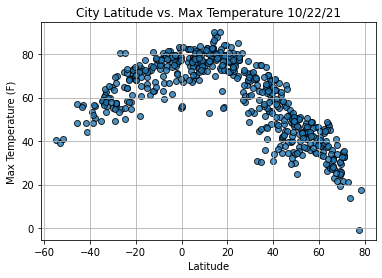

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

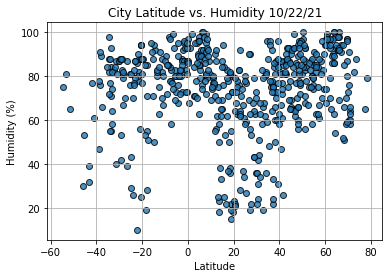

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

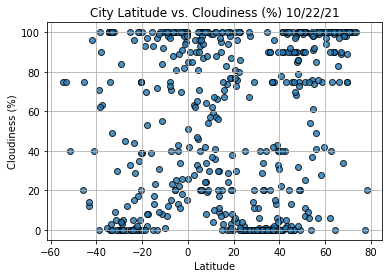

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

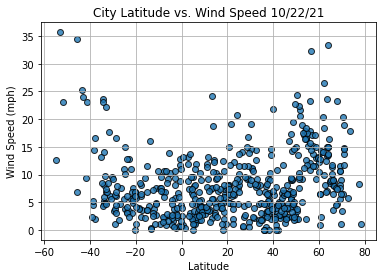

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [17]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
  
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [18]:
index13 = city_data_df.loc[13]
index13

City                    Namanyere
Country                        TZ
Date          2021-10-23 01:33:13
Lat                       -7.5167
Lng                         31.05
Max Temp                    66.67
Humidity                       58
Cloudiness                     71
Wind Speed                   2.17
Name: 13, dtype: object

In [19]:
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3       True
4      False
       ...  
545    False
546     True
547     True
548     True
549     True
Name: Lat, Length: 550, dtype: bool

In [20]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

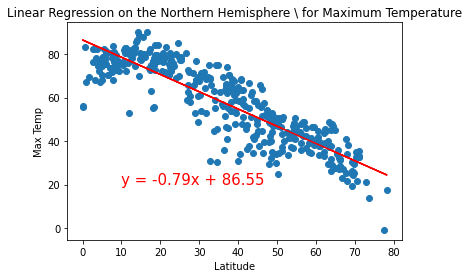

LinregressResult(slope=-0.7944166702048457, intercept=86.54953329082156, rvalue=-0.881415274874496, pvalue=1.9699248307898796e-129, stderr=0.021529607189123525, intercept_stderr=0.8993844276519026)

In [40]:
# Linear regression on the Northern Hemisphere & Max Temp
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \ for Maximum Temperature', 'Max Temp',(10,20))

plt.show()
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
linregress(x_values, y_values)

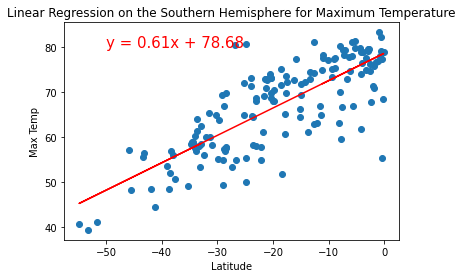

LinregressResult(slope=0.6105614015204525, intercept=78.68064366257805, rvalue=0.7916904187588384, pvalue=5.416678908894972e-35, stderr=0.0378437544637474, intercept_stderr=0.8898193323685197)

In [39]:
# Linear regression on the Southern Hemisphere & Max Temp
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp', (-50, 80))



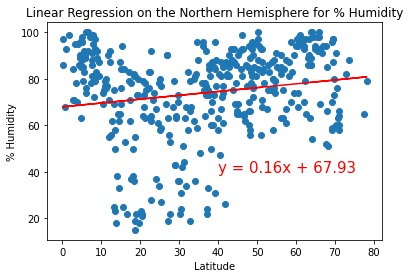

LinregressResult(slope=0.1648810800865921, intercept=67.9260967420658, rvalue=0.17234685659592155, pvalue=0.0006003159117132044, stderr=0.047657507433772096, intercept_stderr=1.9908593626498186)

In [38]:
# Linear regression on the Northern Hemisphere & Humidity


x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

#Call the funtion

plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,40))

(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
linregress(x_values, y_values)

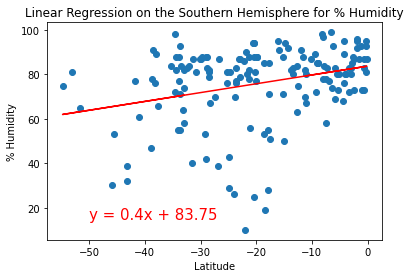

LinregressResult(slope=0.39722597414925875, intercept=83.74502026144188, rvalue=0.29676559315183365, pvalue=0.00016056602929624363, stderr=0.10266893027644075, intercept_stderr=2.414052207243028)

In [37]:
# Linear regression on the Southern Hemisphere & Humidity

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50, 15))


(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
linregress(x_values, y_values)

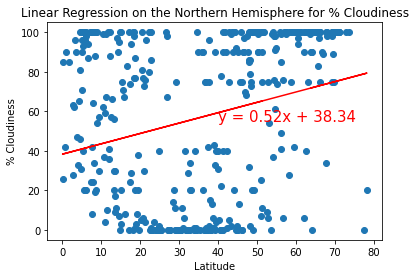

LinregressResult(slope=0.5240484299234138, intercept=38.33671815742688, rvalue=0.2630978477647703, pvalue=1.2057082114511124e-07, stderr=0.09718274459798883, intercept_stderr=4.059741841089367)

In [45]:
# Linear regression on the Northern Hemisphere and % Cloudiness

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

#Call the funtion

plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(40,55))

(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
linregress(x_values, y_values)

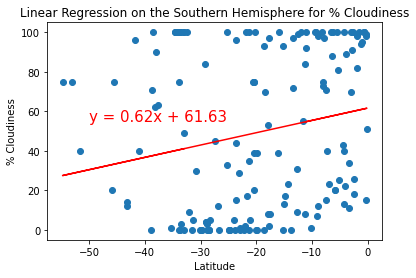

LinregressResult(slope=0.6229157039365772, intercept=61.627660692950016, rvalue=0.2005803742216588, pvalue=0.011774433550283478, stderr=0.2443756986010502, intercept_stderr=5.7460002068395335)

In [49]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function

plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness', (-50,55))
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
linregress(x_values, y_values)

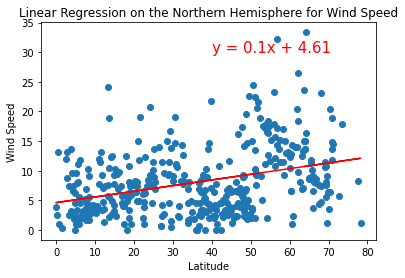

LinregressResult(slope=0.09570206392115697, intercept=4.607400891085124, rvalue=0.3423498078465418, pvalue=3.0123277284659145e-12, stderr=0.013282908008792615, intercept_stderr=0.5548842815430467)

In [58]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,30))

(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
linregress(x_values, y_values)

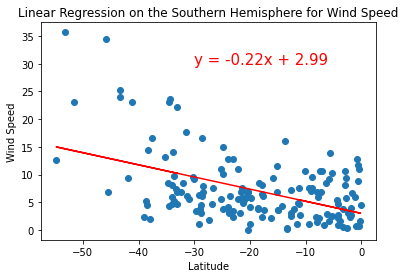

LinregressResult(slope=-0.2189316834247969, intercept=2.990279511578283, rvalue=-0.4709309362795068, pvalue=4.836201803643465e-10, stderr=0.03294108285086996, intercept_stderr=0.7745429269692677)

In [59]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-30,30))
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
linregress(x_values, y_values)